In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction
## Wiener Process definition
Wiener process / Brownian motion is a type of stochastic process known by the following characteristics:

- $W_0 = 0$
- $t \rightarrow W_t$ is continuous in t
- The increments of the process are stationary and independent. (Stationary means that it doesn't depend on how long the process has gone on for). These are called a Lévy process.
- Increment $W_{t+s}-W_{s} \sim N(0,t)$ has a normal distribution 

## The code

So first I will need to create a bunch of time steps, and then after that, use the Wiener process definition to create each continuous random jump at each point in time:


In [45]:
t = 500
times = np.linspace(0,1,t) # I create an array of 10000 time steps from t=0 to t=1
dt = times[1] - times[0] # defining an "infinitesimal" time step dt

As defined before, increment $W_{t+s}-W_{s} \sim N(0,t)$ has a normal distribution, and so we can set up our $dW$, our position step.

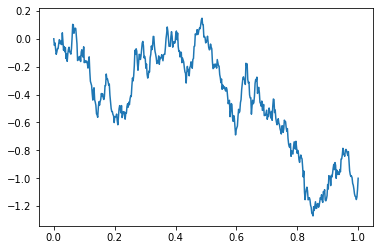

In [60]:
d = 1 # How many we want

def Wiener(t,times, dt, d):
    W0 = np.zeros(shape=(1,d)) # We start at 0
    dW = np.sqrt(dt) * np.random.normal(size = (t-1,d))
    # Without np.sqrt(dt) this would have a variance of 1, 
    # but we want the variance to be our timestep, dt.
    W = np.concatenate((W0, np.cumsum(dW, axis = 0)), axis = 0)
    # Our y-axis variable, W, is the cumulative sum of all of the 
    # little incremental changes in W
    
    plt.plot(times, W)
    plt.show()
    
Wiener(t,times,dt,d)

- If we simulate 500 at once, we can see that after a while it looks a bit like a sideways parabola.

- It also doesn't seem to go outside of a certain set of bounds

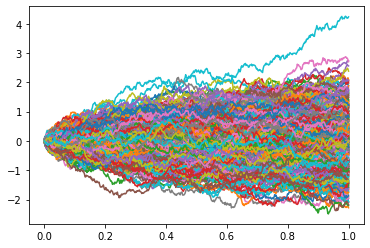

In [57]:
Wiener(t,times,dt,500)

### Quadratic Variation 

If we look at the squares of the differences of each W and add them up, it just looks like a line y = t.

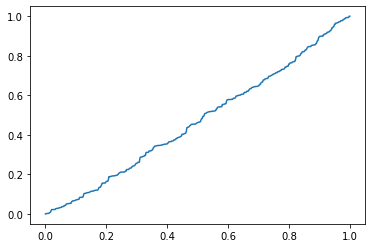

In [63]:
def quadratic_variation(W):
    return np.cumsum(np.power(np.diff(W, axis = 0, prepend = 0),2),axis=0)

plt.plot(times, quadratic_variation(W))

 ## Modelling a stock price using Geometric Brownian motion
 
Let's use our knowledge to model a stock price S(t) using the Wiener process. First we will need to introduce Drift and Geometric Brownian motion.

We can define a stochastic process in this way:

$$ X(t) = \mu t +\sigma W(t)$$

This is a Wiener process with an additional drift variable $\mu t$ and infinitesimal variance $\sigma^2$. We can write a geometric Brownian motion as 

$$ S_t = S_0 \cdot exp \left(\mu t - \frac{\sigma ^2 t}{2} + \sigma W_t \right)$$

This ensures that it will never take a negative value, like stocks.

Let's code this!
 
 

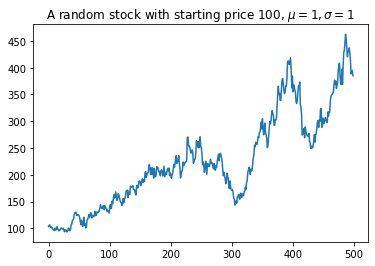

In [213]:
def constant_geometric_wiener(t,dt,mu,sigma):
    x0 = 100 # default stock price is 100
    x = np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) *
               np.random.normal(size = (t-1,d)))
    x = x0 * x.cumprod(axis=0)
    
    plt.plot(x, label = "Stock price")
    plt.title(f"A random stock with starting price 100, $\mu = {mu}, \sigma = {sigma}$")
    plt.show()
    
    
constant_geometric_wiener(t,dt,mu=1,sigma = 1) # drift = volatility = 1

- Let's vary the drift and volatility:

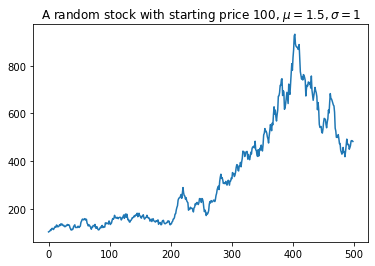

In [215]:
constant_geometric_wiener(t,dt, mu = 1.5, sigma = 1)

 With a higher drift, we can see that the stock price will increase 

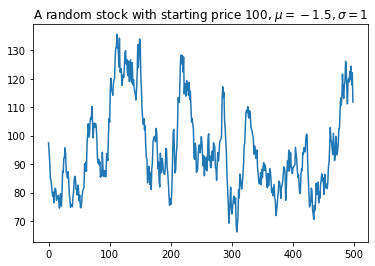

In [219]:
constant_geometric_wiener(t,dt, mu = -1.5, sigma = 1)

With a lower drift, the stock price is forecasted to decrease

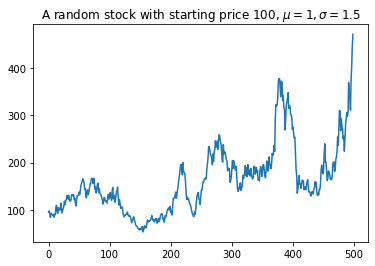

In [220]:
constant_geometric_wiener(t, dt, mu = 1, sigma = 1.5)

Higher volatility makes the jumps in prices larger 

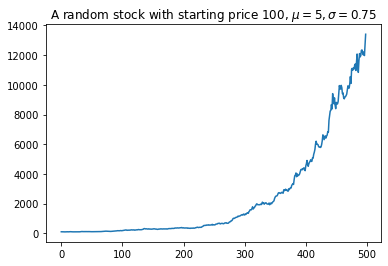

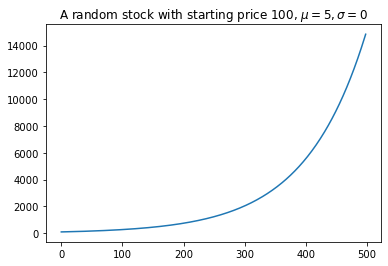

In [223]:
constant_geometric_wiener(t,dt, mu = 5, sigma = 0.75) 
constant_geometric_wiener(t,dt, mu = 5, sigma = 0) 

As we decrease volatility, we see that the Geometric Brownian motion approaches an $e^t$ graph.

### Drawbacks of Geometric Brownian Motion

Geometric Brownian motion is the most commonly used method to model prices in the Black-Scholes model, however it is not totally realistic, since volatility, $\sigma$, can change over time. As well as this, stocks can jump up or down unpredictably due to certain events in the news, which is quite difficult to model.

We can also model volatility as a different Brownian motion: 

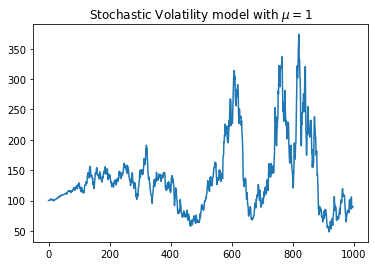

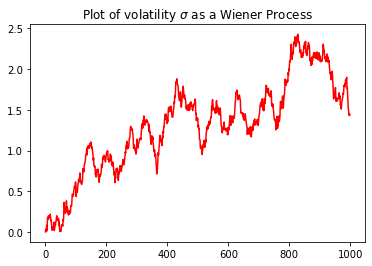

In [253]:
def geometric_wiener(t,dt,mu):
    x0 = 100 # default stock price is 100
    
    sigma0 = np.zeros(shape=(1,d)) 
    dsigma = np.sqrt(dt) * np.random.normal(size = (t-2,d)) 
    sigma = np.absolute(np.concatenate((sigma0, np.cumsum(dsigma, axis = 0)), axis = 0))
    #This is the same as our code for a normal wiener process, but since volatility
    #is always positive, I've taken the absolute value. There aren't many online resources
    #about this, so this may be wrong!
    
    x = np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) *
               np.random.normal(size = (t-1,d)))
    x = x0 * x.cumprod(axis=0)
    
    plt.figure(1)
    plt.plot(x)
    plt.title("Stochastic Volatility model with $\mu = 1$")
    
    plt.figure(2)
    plt.plot(sigma, color = 'red')
    plt.title("Plot of volatility $\sigma$ as a Wiener Process")
    
geometric_wiener(1000,dt,mu=1) # drift is set to 1 